## Задание 2

In [1]:
#Подключаем необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns

import scipy.stats as stats

import matplotlib.pyplot as plt

#Загружаем данные, удостоверяемся, что загрузилось верно 
data = pd.read_csv('part2_data.csv', delimiter=";", decimal=',')
#data.info()
data.head(5)
#data.count()

,m_costs,salary
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [2]:
#Задача 1:
#Постройте линейную регрессионную модель, позволяющую предсказывать объем 
#продаж в регионе в зависимости от расходов на рекламу. Напишите уравнение регресссии.

# При построении модели воспользуесмя МНК (метод наименьших квадратов) решение приведем в векторном виде.
# Данный способ построения модели выбран с целью демонстрации, на практике используются соответствующие классы 
# библиотеки scikit-learn LinearRegression.

\begin{equation*}
Y = f(x, \theta) = \theta_{1}x_{0} + \theta_{2}x_{1}
\end{equation*}

$
\text{ где  } x_{0} = 1 \text{ тогда } \\
$

\begin{equation*}
Y = f(x, \theta) = \theta_{1} + \theta_{2}x_{1} \\
\end{equation*}

$
\text{ введем матрицу } A = [[1, x1], 
                             [1, x2], 
                             [1, ...],
                             [1, xn]]  \\
$


$
\text{ выразим } \theta \\
$

\begin{equation*}
\theta = (A^{T}A)^{-1} A^{T} Y \\
\end{equation*}

$
\text{ где  } (A^{T}A)^{-1} A^{T}  \text{ - псевдообратная матрица обозначается как } A^{+} \\
$


In [3]:
def predict(x, theta):
    return theta[0] + theta[1] * x

def fit_reg(x, y):
    #Создаем матрицу A
    A = np.ones((x.shape[0], 2))
    A[:, 1] = x    
    
    #Находим псевдообратную матрицу
    a_plus = np.linalg.pinv(A)
    
    #Находим Тету
    theta = a_plus.dot(y)
    
    return theta , A


x = data['m_costs'].to_numpy()
y = data['salary'].to_numpy()

theta, A  = fit_reg(x, y)
print("theta: " , theta)

theta:  [7.03259355 0.04753664]


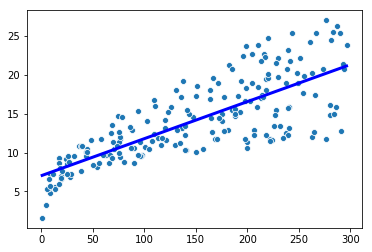

In [4]:
#Задача 2: Дайте графическую интерпритацию, полученных результатов 
#(отобразите на одном графике уравнение регрессии и наблюдения, представленные в наборе данных)

#Найдем значения модели на всем диапазоне x  
reg_line = predict(x, theta)

#print(x.shape)
sns.scatterplot(x=x, y=y) 
sns.lineplot(x=x, y=reg_line, linewidth=3, color='blue')

In [5]:
#Задача 3: Предскажите объем продаж при расходах на рекламу в 121 тыс. руб.
sel = predict(121, theta)
print("Объем продаж при расходах на рекламу в 121 тыс. руб. : {:.2f} тыс. шт.".format(sel))

Объем продаж при расходах на рекламу в 121 тыс. руб. : 12.78 тыс. шт.


In [6]:
#Задача 4: Сделайте вывод о статистической значимости коэффициентов линейной регрессии

# y = ax + b
a, b = theta[1], theta[0]
print("Коэффициенты регрессии a: {:.4f}   b: {:.4f}".format(a,b))

# прогноз модели
y_pred = predict(x, theta) 

# количество наблюдений 
n = x.shape[0]
# количество факторов
m = 1

# средняя ошибка прогноза (модели)
s2e =  (np.sum( (y - y_pred)**2 ) )/(n - m -1)

print("средняя ошибка прогноза (модели) s2e: %f "% s2e)

# Найдем эмперический(экспериментальный) критей Стьюдента модели
s_a = np.sqrt( (s2e) / ( np.sum( (x - x.mean())**2  ) ) )
s_b = np.sqrt( (s2e * np.sum( x**2 )) / (n * np.sum( (x - x.mean())**2 ) ) )

# print("s_a: %f " %s_a)
# print("s_b: %f " %s_b)

t_a = a / s_a
t_b = b / s_b
print("********" )

print("t_a: %f"% t_a)
print("t_b: %f"% t_b)

# критей Стьюдента для оценки значимости коэффициентов модели для 99% доверительного интервала
t_crit = stats.t.ppf(0.99, n-2)
print("t_crit: %f"% t_crit)

# Оценка значимости коэффициентов модели производится с помощью критерия Стьюдента
# Если t_a, t_b > t_crit параметры значимы

if t_a > t_crit: print("коэффициент _a_ значим")
else: ("коэффициент _a_ не значим")
if t_b > t_crit: print("коэффициент _b_ значим")
else: ("коэффициент _b_ не значим")

Коэффициенты регрессии a: 0.0475   b: 7.0326
средняя ошибка прогноза (модели) s2e: 10.618841 
********
t_a: 17.667626
t_b: 15.360275
t_crit: 2.345328
коэффициент _a_ значим
коэффициент _b_ значим
